# Training, testing, and validation

The sum squares error **SSE** is a measure of how well a proposed model fits training data. 
But a major goal of regression, and statistics, is not to fit training data.
A regression model is meant to generalize and predict future unseen data points well.


Suppose we have training data $X_{\text{train}}$ and the corresponding values of interest $y_{\text{train}}$. 
Combining $X$ and $y$ together will be denoted $D_{\text{train}}$.

Also assume we have a prediction model $f(X)$

Then the **Mean Squared Error** is defined as 

$$
    \text{MSE}(D,f) = \frac{ \sum_{i=1}^{N} [y_{i}-f(x_{i})]^{2} }{N}
$$

If the MSE is computed on training data $D_{\text{train}}$ we call this the **training MSE** 


Our goal is not to perform well on data we've already collected, but to perform well on data our model was not trained from.
We aim to minimize our **test MSE** 

$$\text{MSE}(D_{\text{test}},f)$$

where $D_{\text{test}}$ is a data set containing $X$ and $y$ values our model ($f$) has not trained from.



## $\text{MSE}_{\text{train}} \neq \text{MSE}_{\text{test}}$

It may be reasonable to assume minimizing the training MSE should also minimize the test MSE, but this is typically not the case.
Let's look at our data from Class03, the polynomial regression data.

In [92]:
data <- read.csv('polynomialData.csv')
print(head(data))

           x          y
1  0.9958723  8.2420054
2 -0.6556163  2.3114202
3 -0.9176787  4.0842076
4  0.1963727 -5.5386897
5  1.0309346  2.5166174
6  1.2610719 -0.5388713


We can lower our training MSE by fitting more and more complicated polynomials.

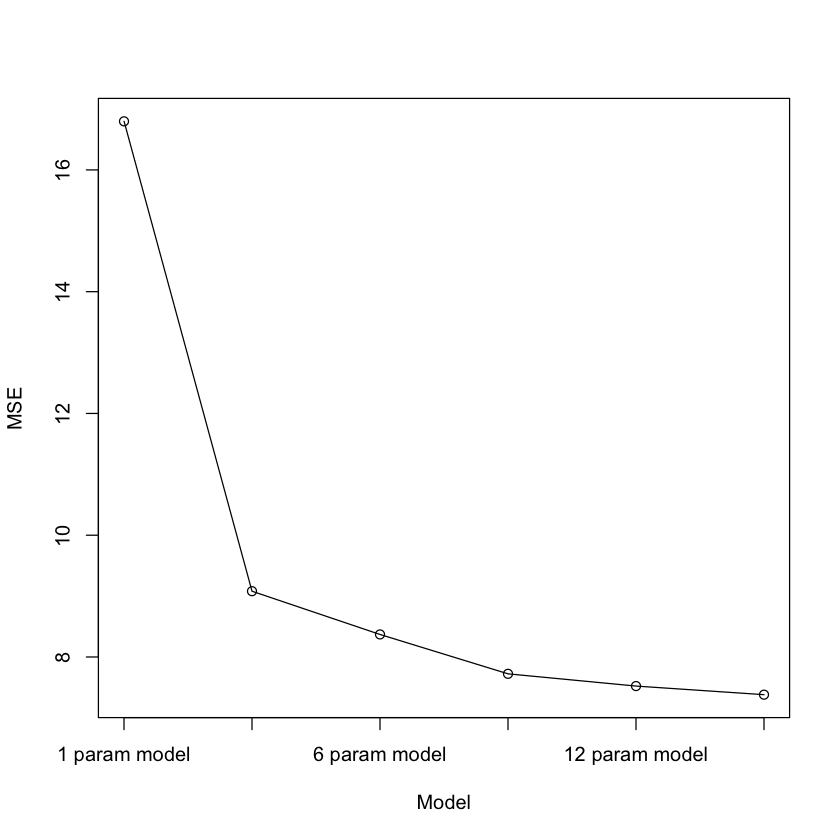

In [93]:
model1 <- lm(y~x,data=data)
model3 <- lm(y~x+I(x^2)+I(x^3),data=data)
model6 <- lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6),data=data)
model9 <- lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8)+I(x^9),data=data)
model12 <- lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8)+I(x^9)+I(x^10)+I(x^11)+I(x^12),data=data)
model20 <- lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8)+I(x^9)+I(x^10)+I(x^11)+I(x^12)
                 +I(x^13)+I(x^14)+I(x^15)+I(x^16)+I(x^17)+I(x^18)+I(x^19)+I(x^20)
              ,data=data)


MSE = function(model,data){
     N = nrow(data)
     return( sum((predict(model,data) - data$y)^2)/N )
}

fromString2Model = function(string){
    return(eval(parse(text=string)))
}

i<-1
MSEs <- rep(0,6)
for (model in c("model1","model3","model6","model9","model12","model20")){
    MSEs[i] <- MSE(fromString2Model(model),data)
    i=i+1
}

plot(MSEs,xlab="Model",ylab="MSE",xaxt = "n")
lines(MSEs)
axis(1, at=c(1,2,3,4,5,6)
     , labels=c("1 param model","3 param model","6 param model","9 param model","12 param model","20 param model"))

This looks like a more complicated model, one with more parameters, should always be better.
Lets look at the functions graphically.

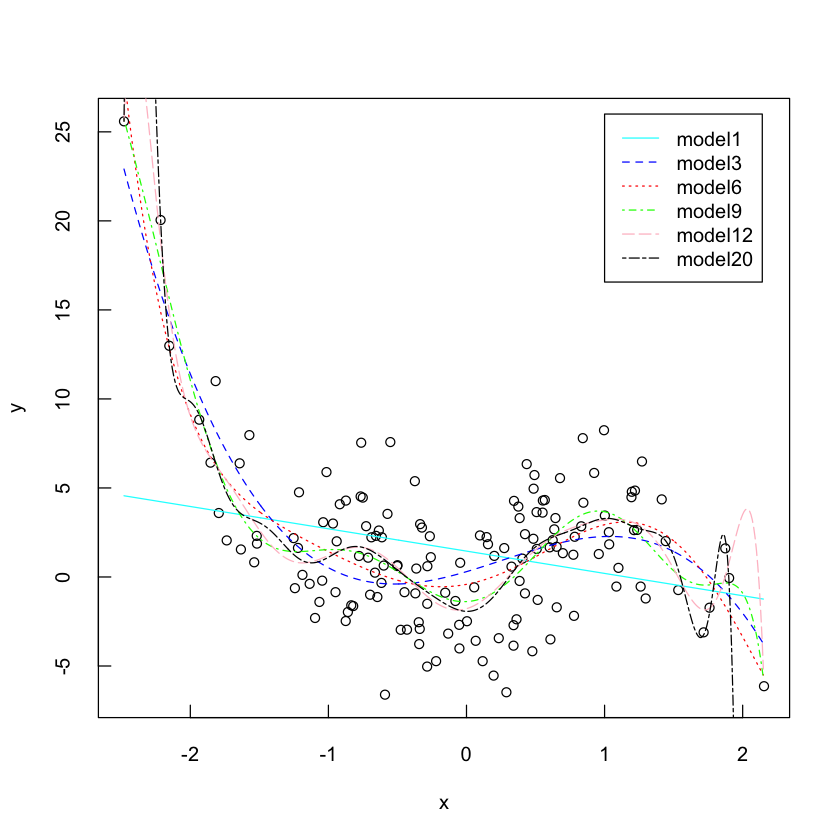

In [94]:
# plot data

plot(data$x,data$y
     ,xlab="x"
     ,ylab="y"
     ,tck=0.02
)

# plot model predictions
minX <- min(data$x)
maxX <- max(data$x)
newdata <- data.frame(x=seq(minX,maxX,0.01))

i<-1
colors = c('cyan','blue','red','green','pink','black')
for (model in c("model1","model3","model6","model9","model12","model20")){
    predictions <- predict(fromString2Model(model),newdata)
    lines(newdata$x,predictions,col=colors[i], lty=i)
    i<-i+1
}

legend(1,26,legend=c("model1","model3","model6","model9","model12","model20")
                     ,col=colors
                     ,lty=1:6
)

The more complicated models have smaller MSE, but also look like they may be learning the training data to well.
We can evaluate the MSE on a set of test data the model hasn't trained on.

           x          y
1  0.9958723  8.2420054
2 -0.6556163  2.3114202
3 -0.9176787  4.0842076
4  0.1963727 -5.5386897
5  1.0309346  2.5166174
6  1.2610719 -0.5388713


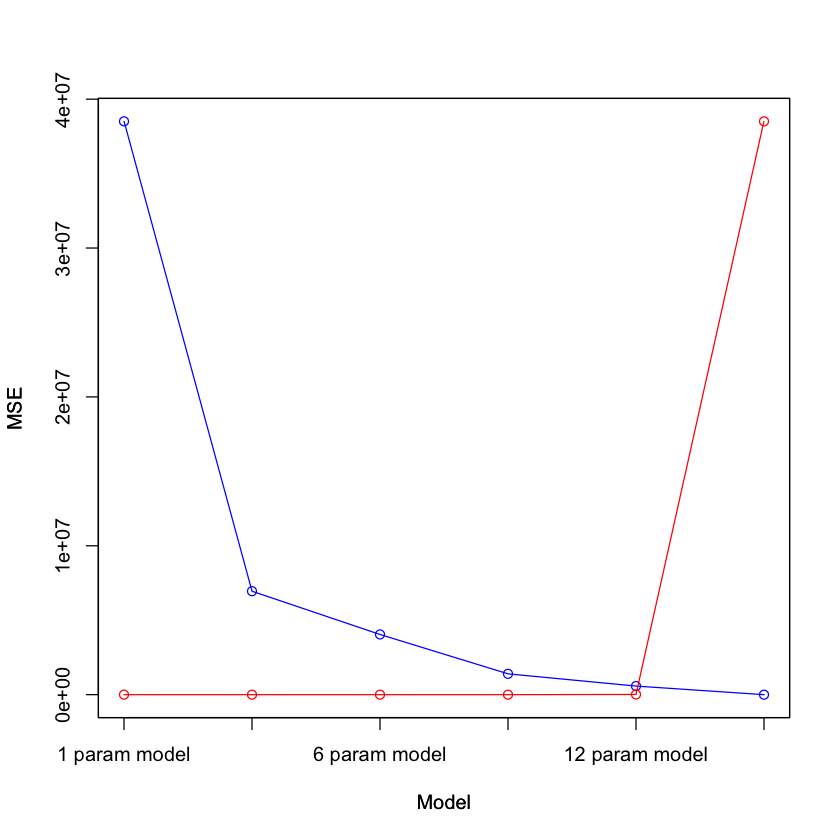

In [106]:
testData <- read.csv('testData.csv')
print(head(data))

i<-1
tstMSEs <- rep(0,6)
for (model in c("model1","model3","model6","model9","model12","model20")){
    tstMSEs[i] <- MSE(fromString2Model(model),testData) # notice change here from training to test data
    i=i+1
}
plot(MSEs,xlab="Model",ylab="MSE",xaxt = "n",yaxt = "n",col="blue")
lines(MSEs,xaxt = "n",col="blue")

par(new=TRUE)
plot(tstMSEs,xlab="Model",ylab="MSE",xaxt = "n",col="red")
lines(tstMSEs,col="red")

axis(1, at=c(1,2,3,4,5,6)
     , labels=c("1 param model","3 param model","6 param model","9 param model","12 param model","20 param model"))

#legend()


Though the training error gets better with more model complexity, the more complicated the model the higher the test mse. 
More complicated models **overfit** the training data.
instead of learning to generalize, the model learns fluctuations in the training data.

## Bias-variance tradeoff

More complicated models tend to not only learn the true function $f$, our signal, but the noise too.
Assume we have a response variable $y$ we're interesting in understanding as a function of $x$.
Further assume that $y$ has the following form $y = f(x)+\epsilon$, where $f(x)$ is the **true** function.
Then we can write our MSE as

\begin{align}
\text{MSE} &= E_{XY}[y - \hat{f}(x)]^{2}\\
           &= E[f(x)+\epsilon - \hat{f}(x)]^{2}\\
           &= E[f(x)-E(\hat{f}) + E(\hat{f})-\hat{f}(x) + \epsilon ]^{2}\\
           &= [f(x)-E(\hat{f})]^{2} + E[E\hat{f}-\hat{f}(x)]^{2} + \epsilon^{2}\\
           &= \text{Bias}^2 + \text{Variance} + \text{Error}
\end{align}

Our expectation is over the probability of (X,y) pairs. 
Intuitively, you can imagine this expectation as the average over all possible training data sets we could have received. 

*Bias*

The bias measures how far our predicted function $\hat{f}$ is from the true function $f$.

*Variance*

The variance measures how much our predicted model changes for changes in our training set.

$\epsilon^2$

This an irreducible error made by assumptions about the form of the problem, a quantity we cannot change. 
